# BEE 4750 Homework 1: Introduction to Using Julia

**Name**: Isabel Camara

**ID**: 5273977

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [34]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/hw1-isabelcamara`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [35]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [36]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [37]:
#Incorrect Version
function minimum(array)
    min_value = 0 
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


The error with the above function is in the line "min_value = 0". The function should not have the minimum value set to 0. There may not be a 0 in the array which is being assessed and the returned value is defaulted to 0 when values are not less than 0 in an array, resulting in an incorrect answer. The function should instead use a minimum value which is present in the array and compare against other values in the array. To correct this, set the first element in the array as the minimum so that the correct elements can be compared.

In [38]:
#Fixed Version
function minimum(array)
    min_value = array[1] 
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [39]:
#Incorrect version
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

average_grade = 94.4


In [40]:
#Fixed version
using Statistics 
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

average_grade = class_average(student_grades) 
@show average_grade;


average_grade = 94.4


The error "average_grade" results because the function class_average is not called out. The function call is needed so that the variable average_grade can be evaluated. Additionally, a call for the Statistics library is needed; one cannot use the mean() function without it. 
Resource used: https://docs.julialang.org/en/v1/stdlib/Statistics/

#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [41]:
#Incorrect version
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zero(n_trials) 
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

In [42]:
#Fixed version
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials) 
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.382


Change to the zeros function to create an array of zeros. The zero() function does not create the array necessary to store the outcome elements but instead returns 0 in the form of the argument. 
Resources used: https://docs.julialang.org/en/v1/base/arrays/ ; https://www.jlhub.com/julia/manual/en/function/zero 

### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [43]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y) #the ! serves as a way to sort through values that are NOT in the array y
            append!(y, v) # adds unique element v to the end of array y
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);



mystery_function(list_of_values) = Any[1, 2, 3, 4]


The purpose of the mystery function is to add unique elements to an array, maintaining the order of elements as they are presented.
y serves as the array which contains the values to sort through, whille the if statement sorts out the redundant values.

Resources: https://www.jlhub.com/julia/manual/en/function/append-exclamation 

In [44]:
#Built-in function
list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
unique(list_of_values)



4-element Vector{Int64}:
 1
 2
 3
 4

The unique function removes duplicates in a given array, writing elements in the order they are presented. 
Resources: https://docs.julialang.org/en/v1/base/collections/ 

In [45]:
#Problem 3
function compute_mean(v)
    sum=0
    for i in v #loop through array v
        sum = sum+i #sum all elements of v by adding new element i to previously calculated sum
    end
    mean = sum/length(v)
    return mean
end

random_vect=rand(10) #generate array of 10 values
@show random_vect
x = compute_mean(random_vect)
y = random_vect .- x
@show compute_mean(random_vect)
@show y
q = abs(round(compute_mean(y)))
@show q

random_vect = [0.18289047842684425, 0.45597770410169736, 0.9594724029201155, 0.017948696356010374, 0.5520891228901076, 0.6353820717192517, 0.8136704848401125, 0.5645968320230955, 0.7291789206024908, 0.5917724650697984]
compute_mean(random_vect) = 0.5502979178949523
y = [-0.36740743946810805, -0.09432021379325495, 0.4091744850251632, -0.5323492215389419, 0.0017912049951552822, 0.08508415382429935, 0.2633725669451602, 0.014298914128143214, 0.17888100270753848, 0.04147454717484611]
q = 0.0


0.0

**In this problem**:

-   Explain the purpose of `mystery_function`.
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

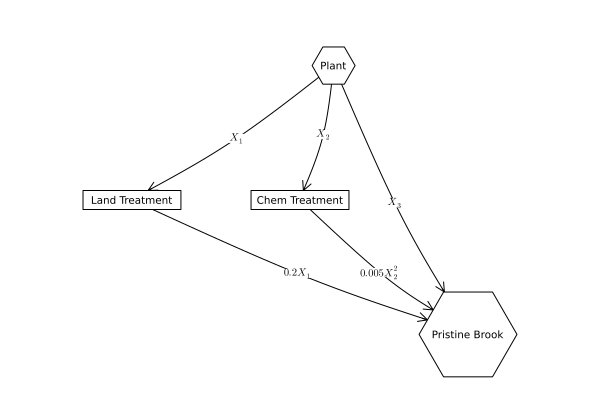

In [46]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1", (1,3) => L"X_2", (1, 4) => L"X_3",(2, 4) => L"0.2X_1",(3, 4) => L"0.005X_2^2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

Mathematical Model: Treatment cost and YUK discharge amounts

Variables:
* Q = flow ($\text{m}^3\text{/day}$) 
* $C_0$ = initial concentration ($1$ $\text{kg}\text{/m}^3$)
* $X_1$, $X_2$, $X_3$ = quantity of wastewater disposed of for the three disposal methods ($\text{m}^3\text{/day}$), where 1 denotes land treatment, 2 denotes chemical treatment, and 3 denotes no treatment 
* $cost_1$, $cost_2$, $cost_3$ = costs for the three disposal methods (dollars), where 1 denotes land treatment, 2 denotes chemical treatment, and 3 denotes no treatment 
* $e_1$, $e_2$, $e_3$ = removal efficiency for the three disposal methods, where 1 denotes land treatment, 2 denotes chemical treatment, and 3 denotes no treatment 


The plant produces 100 $\text{m}^3\text{/day}$ wastewater containing 1 $\text{kg}\text{/m}^3$ of YUK. Thus, 100 kilograms are produced per day, calculated by:

100 $\text{m}^3\text{/day}$  * 1 $\text{kg}\text{/m}^3$  = 100 $\text{kg}\text{/day}$ 

Regarding the costs for each disposal method, the following equations are given:

$cost_1$ = ${X_1}^2$/$20$

$cost_2$ = $X_2$ * $1.50$

$cost_3$ = $0$ because there is no treatment, only a direct disposal into Pristine Brook

treatment_cost = $cost_1$ + $cost_2$ + $cost_3$ = ${X_1}^2$/20 + $X_2$ * $1.50$

Knowing that $e_1$ = 0.8, $e_2$ = $1 - 0.005X_2$, and $e_3$ = $0$, we can write an equation for the final amount in kg/day of YUK dischraged into Pristine Brook:

First, multiply $X_1$ and $X_2$ by the intial concentration $C_0$ 1 $\text{kg}\text{/m}^3$ so that their new units are in $\text{kg}\text{/day}$

Then, apply the efficiencies so that the final amounts in Pristine Brook can be determined:

$X_1$: $(1-.8)X_1$ = $.2X_1$

$X_2$: $(1 - (1-.005*X_2$)) * $X_2$ = $.005$*${X_2}^2$

$X_3$ = $100$ - $X_1$ - $X_2$

$YUK_f$ = ($100$ -$X_1$-$X_2$) + $.2X_1$ + $.005$*${X_2}^2$ $kg/day$

In [47]:
#Compute YUK amount and cost of treatment 

function Pristine_Brook(X1,X2)
#X1, X2 are the quantity of wastewater disposed of for land treatment and chemical treatment, respectively 
#YUK_f is the final amount of YUK after treatment methods have been applied 

#Using the equations written above
    if X1+X2 <=100
        YUK_f = (100-X1-X2) + .2X1 + .005*X2*X2
        treatment_cost = (X1)^2/20 + (X2 * 1.5) 
        return YUK_f, treatment_cost 
    else
        print("Discharge greater than 100m^3/day")

    end
end

Pristine_Brook (generic function with 1 method)

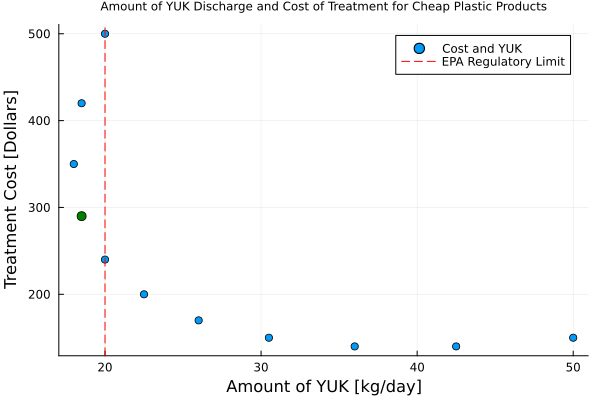

In [48]:
#Test with numbers
X1 = [0,10,20,30,40,50,60,70,80,90,100]
X2 = [100,90,80,70,60,50,40,30,20,10,0]
matrix = zeros(11,2) #create empty matrix of 11 rows, 2 columns to match X1 and X2 arrays

for i in 1:11
    values = Pristine_Brook(X1[i],X2[i]) #values is an output for Pristine Brook function, which consists of YUK_f and treatment_cost
    matrix[i,1] = values[1] #store final YUK amounts into column 1
    matrix[i,2] = values[2] #store cost of treatment values into column 2
end

#Plot the results
using Plots
x_vals = matrix[:,1]
y_vals = matrix[:,2]
scatter(x_vals, y_vals, title = "Amount of YUK Discharge and Cost of Treatment for Cheap Plastic Products", titlefont = font(8), xlabel = "Amount of YUK [kg/day]", ylabel = "Treatment Cost [Dollars]", label = "Cost and YUK")
#Add EPA regulatory limit
vline!([20], color=:red, linestyle=:dash, label = "EPA Regulatory Limit")
scatter!([18.5], [290], color = "green", label = "", markersize = 5)
#Plotting Resource: https://docs.juliahub.com/UnitfulRecipes/KPSlU/1.6.1/examples/2_Plots/
#https://stackoverflow.com/questions/66149950/julia-plotting-how-to-add-both-a-single-point-and-a-list-of-points-to-a-scatter 

One combination of wastewater discharge and treatment that satisfies the YUK effluent standard is at a YUK amount of 18.5 kg/day and $290 treatment cost (plotted with a green dot). In regards to a tradeoff between treatment cost and YUK concentration, it is ideal to minimize cost while also minimizing human health risk with exposure to high levels of YUK. Thus, it is best to remain at the lower end of cost that satisifies EPA regulatory requirements, such as the area where the green dot is located. In order to find a better solution, we would need to know whether or not we should prioritze minimizing costs or minimizing human health exposure to YUK.

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.

Resources:
https://www.jlhub.com/julia/manual/en/function/append-exclamation 

https://docs.julialang.org/en/v1/stdlib/Statistics/

https://docs.julialang.org/en/v1/base/arrays/

https://www.jlhub.com/julia/manual/en/function/zero 

https://docs.juliahub.com/UnitfulRecipes/KPSlU/1.6.1/examples/2_Plots/

https://stackoverflow.com/questions/66149950/julia-plotting-how-to-add-both-a-single-point-and-a-list-of-points-to-a-scatter 